<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-редких-и-выбивающихся-значений" data-toc-modified-id="Обработка-редких-и-выбивающихся-значений-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обработка редких и выбивающихся значений</a></span></li><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Время продажи квартиры</a></span></li><li><span><a href="#Взаимосвязь-параметров" data-toc-modified-id="Взаимосвязь-параметров-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Взаимосвязь параметров</a></span></li><li><span><a href="#Укрупнение-групп" data-toc-modified-id="Укрупнение-групп-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Укрупнение групп</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

Предоставлены данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача - определить параметры для определения стоимости, что позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.  

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Изучение данных из файла

Импорт библиотек:

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime as datetime
import math
import seaborn as sns

Распаковка файла:

In [142]:
path_1 = '/datasets/real_estate_data.csv'
path_2 = r'C:\Users\HP\Desktop\Yandex Analytics\Projects\Project_3_real_estate_exploration\real_estate_data.csv'

#добавим параметр parse_dates для преобразования дат сразу в datetime

if os.path.exists(path_1):
    data = pd.read_csv(path_1, sep = '\t', parse_dates=['first_day_exposition'])
elif os.path.exists(path_2):
    data = pd.read_csv(path_2, sep = '\t', parse_dates=['first_day_exposition'])
else:
    print('Path not found')

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


На этапе первичного просмотра уже ясно, что в данных много пропущенных значений в числовых столбцах. Выведем полную информацию о том, какие данные и каких типов находятся в таблице:

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Воспользуемся также методом describe(), чтобы сразу получить информацию о минимальных и максимальных значениях и возможных выбросах данных:

In [144]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Практически во всех колонках есть пропуски данных, их много, и возможно большая часть пропусков не является ошибкой. Пропущенные значения в столбцах `balcony`, `airports_nearest`, `parks_nearest` и `ponds_nearest` могут объясняться тем, что этих объектов нет рядом с квартирой, поэтому их не указывают. Пропуски в столбце `kitchen_area` также можно объяснить: если в квартире открытая планировка, то кухня не выделена в отдельное помещение, площадь которого можно было бы указать. Подробно разберем и обработаем пропуски в разделе "Предобработка данных".  
Помимо пропусков сразу бросается в глаза тип данных `object` в колонке `is_apartment`, т.к. название столбца предполагает ответ на вопрос, является ли квартира апартаментами (да/нет). Данные в этом столбце нужно будет преобразовать. Столбец `first_day_exposition` был преобразован в формат даты при загрузке.
Также, приведем названия столбцов к единому регистру для удобства дальнейшей обработки и восприятия. 

Предварительно можно утверждать, что есть выбросы данных. В столбце `living area` минимальное значение 2м², это же относится к колонке `kitchen_area` - минимальное значение там 1,73м². Слишком маленькое минимальное значение также в столбце с ценой `last_price`, а в столбце с высотой потолков `ceiling_height` проблема и в минимальном, и в максимальном значениях.  
Также вызывает сомнения максимальная площадь 900м² в столбце `total_area` и 19 комнат в столбце `rooms`. Проверим, выбросы ли это, в ходе EDA и отфильтруем при необходимости.  

Итак, в данных обнаружены следующие проблемы, которые требуют исправления:  
- разный регистр в названиях столбцов;
- пропуски числовых значений;
- данные требуют преобразования типов;
- выбросы данных;

## Предобработка данных

### Обработка пропусков

Сначала обработаем названия колонок для удобства работы с ними. Все названия приведем к единому регистру.

In [145]:
data.rename(columns={'cityCenters_nearest':'city_centers_nearest',
                     'parks_around3000':'parks_around_3000',
                     'ponds_around3000':'ponds_around_3000'}, inplace=True)

При знакомстве с данными обнаружилось большое количество пропущенных значений. Выведем общее число пропусков по столбцам.

In [146]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Известно, что часть данных пользователи заполняют вручную, а часть получены на основе картографических данных, ошибки при заполнении могут быть и там, и там. Всего в нашей таблице 23698 строк.  

- `floors_total` - данные в этом столбце вносятся вручную. Можно предположить, что этаж не указали, потому что он всего один, но значение может быть пропущено и случайно. В этом столбце всего 86 пропусков, что около 0,3% от всех данных, можно удалить эти строки. Это же касается и столбца `locality_name` - в нем 49 пропущенных значений. Без названия населенного пункта вся строка не имеет смысла, эти строки удалим тоже.

In [147]:
data = data.dropna(subset={'floors_total', 'locality_name'}).reset_index(drop=True)

- `ceiling_height` - эти данные также вносятся вручную, и количество пропусков значительное. Высота потолков - важный параметр, который имеет значение при выборе недвижимости. Нежелательно заменять его на медианное или среднее значение, это может не соответствовать действительности. Удаление строк также не подойдет, потому что тогда потеряется слишком большая часть других важных параметров. Попробуем предсказать возможные значения высоты потолков на основе других данных.  
Выведем список уникальных значений из столбца `floors_total`, отфильтровав строки с NaN в колонке `ceiling_height`.

In [148]:
data[data['ceiling_height'].isna()]['floors_total'].value_counts()

5.0     2113
9.0     1201
25.0     552
16.0     511
12.0     508
10.0     424
4.0      406
17.0     330
6.0      292
3.0      268
24.0     246
18.0     230
14.0     210
19.0     205
7.0      192
8.0      169
2.0      168
23.0     154
22.0     145
15.0     140
20.0     115
13.0     112
21.0      93
11.0      93
27.0      92
26.0      70
35.0      16
1.0       15
28.0      12
36.0       1
33.0       1
Name: floors_total, dtype: int64

Стандартная высота потолков зависит от серии и года постройки дома. Этих данных в таблице нет, но есть количество этажей, от которого можно отталкиваться. Изучение типовых серий жилых домов дает следующие результаты:  
- дома до 5 этажей бывают так называемой "сталинской" или "хрущевской" серии, высота потолков там соответственно 2,95-3,00 м или 2,5 м. Примем для этой группы значение 2,5, как наиболее частотное;
- дома от 6 до 8 этажей чаще всего сталинской застройки, примем для них значение 2,95 м;
- самая большая группа среди типовых серий - 9-25 этажей. Высота потолков в зависимости от серии варьируется от 2,48 м до 2,7 м, но самый частотный вариант 2,64 м;
- домов выше 25 этажей в списке типовых серий жилых домов нет. Обзор высотных зданий России в открытых источниках содержит информацию о потолках переменной высоты – от 3,5 до 4,9 м, но встречается также 2,7 м, и даже 5,5 м! Также на агрегаторах недвижимости нашлось 7 новостроек выше 25 этажей в Санкт-Петербурге и области, высота потолков там составляет 2,75, 2,6, 2,6, 2,6, 2,5, 2,7 и 2,6 м. Примем для этой группы более вероятное частотное значение 2,6 м.  

Добавим в датафрейм столбец с категорией этажности, а потом заполним пропуски в столбце `ceiling_height` на основании категории.

In [149]:
# функция для разбивки на категории в зависимости от количества этажей
def make_floor_category(floors):
    if floors <=5:
        return '1-5'
    if floors <=8:
        return '6-8'
    if floors <=25:
        return '9-25'
    return 'over_25'

data['floor_category'] = data['floors_total'].apply(make_floor_category)
data['floor_category'].value_counts()

9-25       13295
1-5         8041
6-8         1887
over_25      342
Name: floor_category, dtype: int64

In [150]:
# создаем переменные для каждой категории
cat_1 = data['floor_category'] == '1-5'
cat_2 = data['floor_category'] == '6-8'
cat_3 = data['floor_category'] == '9-25'
cat_4 = data['floor_category'] == 'over_25'
# заполняем пропуски по условию из переменных
data.loc[cat_1, 'ceiling_height'] = data.loc[cat_1, 'ceiling_height'].fillna(2.50)
data.loc[cat_2, 'ceiling_height'] = data.loc[cat_2, 'ceiling_height'].fillna(2.95)
data.loc[cat_3, 'ceiling_height'] = data.loc[cat_3, 'ceiling_height'].fillna(2.64)
data.loc[cat_4, 'ceiling_height'] = data.loc[cat_4, 'ceiling_height'].fillna(2.6)

In [151]:
data['ceiling_height'].isna().sum()

0

- `living_area` - возможно, жилая площадь не указана для апартаментов,поскольку юридически эти помещения не предназначены для проживания. Чтобы проверить, так ли это, сначала нужно разобраться с пропусками в столбце `is_apartment`. В этой колонке предполагается всего два варианта ответа True - да, False - нет. Вероятно, если данные не внесли, то это не апартаменты. Заменим отсутствующее на False.

In [152]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].value_counts()

False    23515
True        50
Name: is_apartment, dtype: int64

In [153]:
# отфильтруем сет по пропускам в столбце `living_area` и посчитаем количество апартаментов
data.loc[data['living_area'].isna()]['is_apartment'].value_counts()

False    1857
True        8
Name: is_apartment, dtype: int64

Похоже, что пропуски в столбце `living_area` появились по какой-то другой причине - всего 8 строк являются апартаментами. В таком случае будем ориентироваться на количество комнат и рассчитаем медиану жилой площади по сгруппированным значениям.

In [154]:
# сгруппируем сет по количеству комнат
data_grouped_by_rooms = data.groupby('rooms')
# применяем к сгруппированным значениям функции
data['living_area'] = data_grouped_by_rooms.living_area.apply(lambda x: x.fillna(x.median()))
data['living_area'].isna().sum()

0

- `kitchen_area` - для квартир с открытой планировкой пропуски в этом столбце можно заменить на 0, т.к. при открытой планировке перегородки в помещении отсутствуют. То же самое касается квартир-студий, кухня там не выделена в отдельное помещение.

In [155]:
# выведем количество уникальных значений столбца `open_plan` в отфильтрованной таблице
data[data['kitchen_area'].isna()]['open_plan'].value_counts()

False    2155
True       67
Name: open_plan, dtype: int64

In [156]:
# заменяем значения по условию
data.loc[data['open_plan'] == True,'kitchen_area'] = 0

In [157]:
# сделаем то же самое для `studio`
data[data['kitchen_area'].isna()]['studio'].value_counts()

False    2009
True      146
Name: studio, dtype: int64

In [158]:
data.loc[data['studio'] == True,'kitchen_area'] = 0

Для остальных пропусков в этом столбце замены делать не будем, поскольку в таблице нет критериев, по которым можно было бы уверенно определить площадь кухни, а медианное значение исказит исходные данные.

- `balcony` - предполагаем, что если количество балконов не указано, значит, их нет. Соответственно, все пропуски в этом столбце можно заменить на 0.

In [159]:
data['balcony'] = data['balcony'].fillna(0)

Из необработанных пропусков остались только расчетные значения, получаемые автоматически. Для расстояний на основе имеющихся данных вряд ли можно подобрать какую-либо логичную замену, которая не влияла бы на другие результаты расчетов, поэтому оставим пропуски в этих колонках как есть.  
Для столбца `days_exposition` можно было бы рассчитать, сколько дней прошло с момента публикации как разницу между текущим днем и значением столбца `first_day_exposition`. Однако в таблице содержится архив, т.е. предполагаем, что все объявления уже сняты с публикации. Заменим пропуски в этом столбце на 0.

In [160]:
data['days_exposition'] = data['days_exposition'].fillna(0)

Проверим, что получилось в итоге: еще раз посчитаем количество пропусков по столбцам:

In [161]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2009
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000        5500
parks_nearest           15535
ponds_around_3000        5500
ponds_nearest           14529
days_exposition             0
floor_category              0
dtype: int64

### Изменение типов данных

Преобразуем типы данных в столбцах. Количество этажей и балконов не может быть дробным, их нужно привести к целочисленному типу. Также имеет смысл сделать это со столбцом `days_exposition` и `last_price`, а колонку `is_apartment` изменим на булев тип.  
Измерения площадей и высоты потолков на мой взгляд не требуется переводить в целочисленный тип. Расстояния можно преобразовать в `Int64`, но этот тип поддерживает не все операции, поэтому кажется разумным вариант оставить эти данные `float`, а во избежание проблем с разрядностью чисел, округлим их.

In [162]:
# функция для округления дробных чисел
def round_float(data):
    for column in data:
        if type(column) == 'float64':
            data[column] = data[column].round()
    return data
data.apply(round_float, axis=0)

data = data.astype({'last_price':'int',
            'floors_total':'int',
            'is_apartment':'bool',
            'balcony':'int',
            'days_exposition':'int'})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21556 non-null  float64       
 13  balcony         

### Обработка дубликатов

Проверим, есть ли в таблице дубликаты. В столбце `locality_name` могут быть неявные дубли.

In [163]:
# выведем уникальные значения `locality_name`
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

На первый взгляд дубликатов не так много, но оценить сложно из-за большого количества значений. Приведем все к нижнему регистру и заменим "ё" на "е".

In [164]:
data['locality_name'] = data['locality_name'].apply(lambda x: x.lower()).str.replace('ё','е')
# проверим на явные дубли
data.duplicated().sum()

0

## Расчёты и добавление результатов в таблицу

Требуется рассчитать:  
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [165]:
data['square_meter_price'] = (data['last_price'] / data['total_area']).astype('int') # столбец с ценой за квадратный метр
data['day_of_the_week'] = data['first_day_exposition'].dt.weekday # добавление дня недели публикации объявления
data['month'] = data['first_day_exposition'].dt.month # добавление месяца публикации объявления
data['year'] = data['first_day_exposition'].dt.year # добавление года

# функция для определения категории этажа
def floor_class(data):
    floor = data['floor']
    floor_total = data['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floor_total:
        return 'последний'
    return 'другой'

data['floor_class'] = data.apply(floor_class, axis=1) # добавление столбца с категорией этажа
data['living_area_ratio'] = (data['living_area'] / data['total_area']).round(2) # отношение жилой площади к общей
data['kitchen_area_ratio'] = (data['kitchen_area'] / data['total_area']).round(2) # отношение площади кухни к общей

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,floor_category,square_meter_price,day_of_the_week,month,year,floor_class,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,0,9-25,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.64,11,18.6,1,False,...,NaN,81,9-25,82920,1,12,2018,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.50,5,34.3,4,False,...,574.0,558,1-5,92785,3,8,2015,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,2.64,14,45.0,9,False,...,234.0,424,9-25,408176,4,7,2015,другой,0.28,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,9-25,100000,1,6,2018,другой,0.32,0.41


## Исследовательский анализ данных

Изучим основные параметры, такие как площадь, цена, число комнат, высота потолков и построим для них сводную таблицу. Сгруппируем датафрейм по количеству комнат, рассчитаем количество записей в каждой группе, для площадей используем медианные значения, а для стоимости рассчитаем и медиану, и среднее.

In [166]:
stat_price = data.pivot_table(index='rooms',
                              values='last_price',
                              aggfunc=['mean','median','count']).round().reset_index(drop=True)
stat_price.columns = ['mean_price', 'median_price','quantity']

stat_area = data.pivot_table(
    index='rooms',
    values=['ceiling_height','total_area','living_area','living_area_ratio','kitchen_area_ratio','kitchen_area'],
    aggfunc='median').reset_index(drop=True)

stat = stat_price.join(stat_area).reset_index(drop=True).sort_values(by='median_price', ascending=False)

In [167]:
stat

,mean_price,median_price,quantity,ceiling_height,kitchen_area,kitchen_area_ratio,living_area,living_area_ratio,total_area
12,420000000.0,420000000,1,2.800,112.00,0.120,409.700,0.460,900.000
14,65000000.0,65000000,1,3.500,100.00,0.170,409.000,0.690,590.000
16,32250000.0,32250000,1,2.500,27.60,0.070,264.500,0.710,374.600
15,28500000.0,28500000,1,3.000,13.00,0.050,180.000,0.670,270.000
13,26829500.0,26829500,2,2.830,21.25,0.080,195.150,0.650,304.200
11,25250000.0,25250000,2,3.415,12.60,0.065,133.900,0.710,188.900
7,51470069.0,24900000,59,3.300,20.00,0.080,145.000,0.680,214.000
9,34152362.0,23750000,8,3.100,14.30,0.050,179.200,0.635,300.950
8,50224167.0,23095000,12,2.950,25.00,0.110,161.000,0.690,235.700
10,26166667.0,23000000,3,3.150,19.80,0.090,161.400,0.650,272.600


Общая площадь, как и жилая плавно возрастает с увеличением количества комнат, но только для квартир с количеством комнат менее 10. Начиная с 10 комнат значения площади распределяются достаточно хаотично. Особенно выделяется строка с 16-ю комнатами: значение общей площади там на уровне 8-9 комнат, а также строка с 12-ю комнатами и нехарактерно большим значением общей площади. В Петербурге довольно много застройки старого жилого фонда с огромными довоенныеми квартирами (некоторые могут занимать целый этаж), превращенными позже в коммунальные. Сейчас такие квартиры продаются как отдельные. Разбивка на комнаты, а значит, и значения общей и жилой площади могут быть любыми, но нельзя исключать и вариант, что эти данные не соответствуют действительности. Тем не менее, в каждой группе более 10 комнат по 1-2 квартиры - эти значения редкие и выделяются из общего ряда, поэтому далее мы их отфильтруем.  

### Обработка редких и выбивающихся значений

Построим гистограммы для каждого параметра.

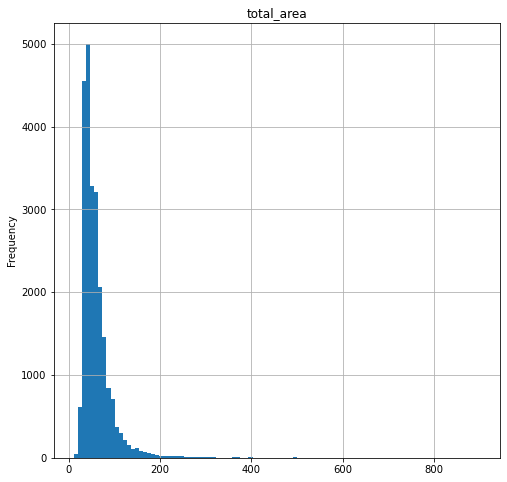

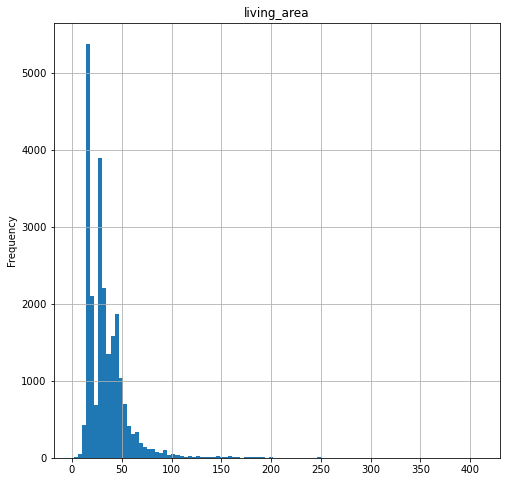

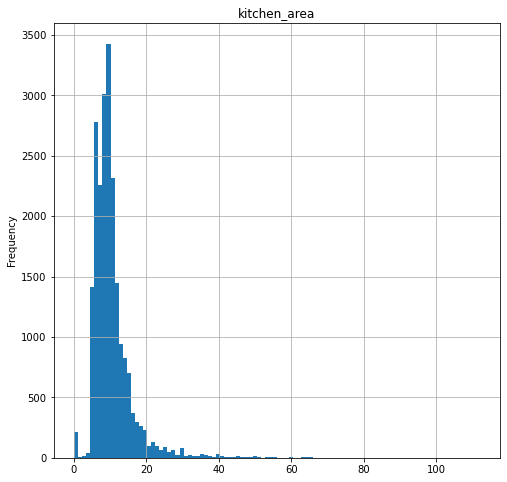

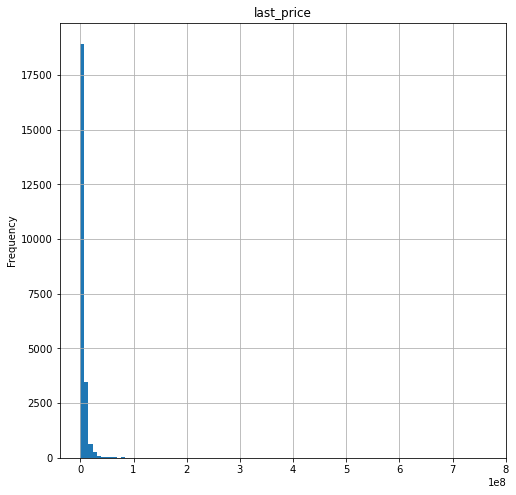

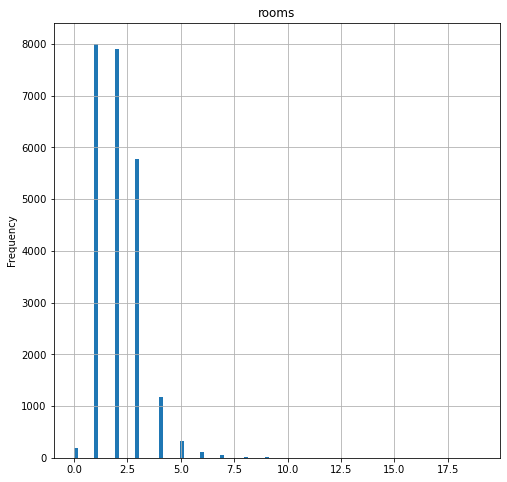

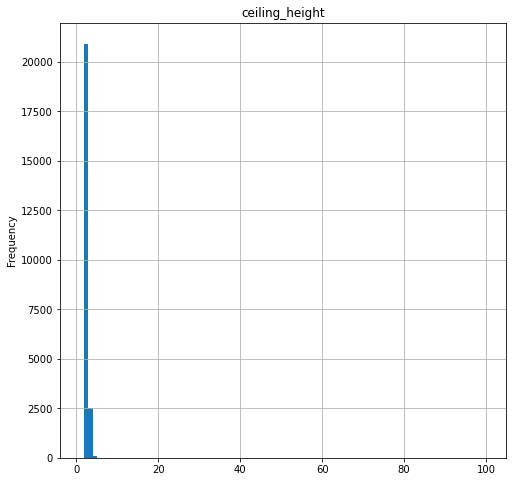

In [168]:
data_parameters = data.loc[:,['total_area','living_area','kitchen_area','last_price','rooms','ceiling_height']]

for column in data_parameters:
    plt.figure(figsize=(8,8))
    data_parameters[column].plot(kind='hist', bins=100, grid=True).set_title(column)

Отфильтруем все "тонкие хвосты":  
- `total_area` - большая часть значений расположилась в промежутке между 40 м^2, и после примерно 220 м^2 значения располагаются очень близко к 0. Установим этот параметр <= 220;
- `living_area` - на гистограмме есть два высоких пика - один в районе 25 м^2, и второй около 18 м^2. Есть очень маленькие значения жилой площади в диапазоне 2-5 м^2, но их количество очень незначительное. Большая часть значений находится в диапазоне от 12 м^2 до 90 м^2;
- `kitchen_area` - есть небольшой пик около 0, это нормально, потому что в таблице есть квартиры-студии и квартиры с открытой планировкой. Основная доля значений расположилась в диапазоне от 5 до 20 м^2. Примем этот параметр <=25;
- `last_price` - по гистограмме сложно сразу сказать, в каком диапазоне находятся значения. Высокий пик около 0, вероятно, дело в масштабе. Мы строили гистограмму на 100 корзин, т.е. основная масса значений расположена до 20 000 000 млн, но хочется уточнить. Воспользуемся `describe` и `boxplot`:

In [169]:
data_parameters['last_price'].describe().round()

count        23565.0
mean       6540058.0
std       10910935.0
min          12190.0
25%        3400000.0
50%        4646000.0
75%        6790000.0
max      763000000.0
Name: last_price, dtype: float64

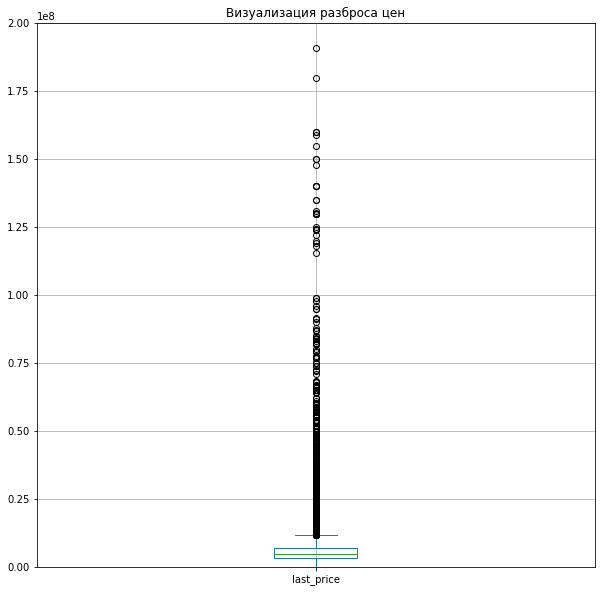

In [170]:
data_parameters['last_price'].plot(kind='box',
                                   grid=True,
                                   figsize=(10,10),
                                   ylim=(0,200000000)).set_title('Визуализация разброса цен')
plt.show()

Очевидно, что разброс цен очень большой, основная масса значений распределяется в диапазоне до 100 000 000 руб, но есть некое количество очень дорогих квартир. Также видим, что минимальное значение в столбце 12 190, вряд ли это реалистичная цена для квартиры. Установим нижний порог 1 500 000, а значения выше 100 000 000 руб отфильтруем как редкие.  

-`rooms` - больше всего таблице 1-,2- и 3-хкомнатных квартир, далее количество плавно снижается и практически сходит на нет после 8. Квартиры с большим количеством комнат отбрасывать не хочется, поэтому создадим общую группу для квартир с большим количеством комнат. В таблице со статистикой видно, что количество записей уменьшается, начиная с 7 комнат, но в отфильтрованном наборе данных это значение может отличаться.

- `ceiling_height` - снова призовем на помощь `boxplot`:

In [171]:
data_parameters['ceiling_height'].describe()

count    23565.000000
mean         2.711295
std          0.994637
min          1.000000
25%          2.500000
50%          2.640000
75%          2.710000
max        100.000000
Name: ceiling_height, dtype: float64

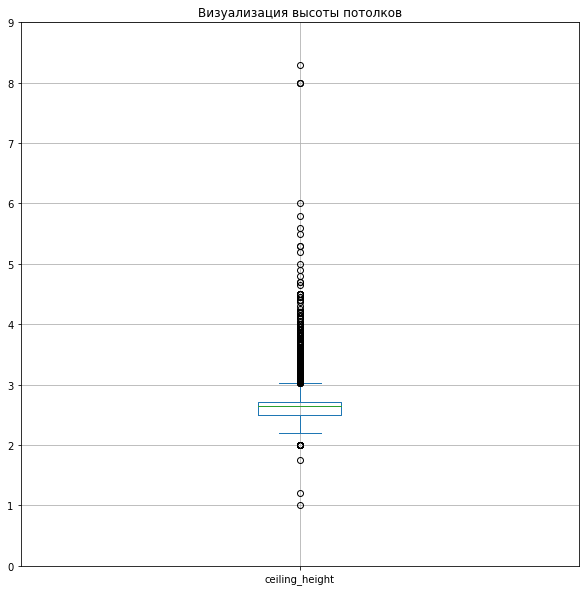

In [172]:
data['ceiling_height'].plot(kind='box',
                            grid=True,
                            ylim=(0,9),
                            figsize=(10,10)).set_title('Визуализация высоты потолков')
plt.show()

Основная масса значений распределилась от 2,5 до 2,7 м. Значения менее 2 м скорее ошибочны, а значения более 4,5 м встречаются редко.  
Создадим отфильтрованный датафрейм с учетом описанных параметров.

In [173]:
# фильруем квартиры по показателям площади
total_area_stat = data.query('total_area <= 220')
living_area_stat = total_area_stat.query('12 <= living_area <= 90') 
good_area_stat = living_area_stat.query('kitchen_area <= 25')
# добавляем фильтр по стоимости - более 1 500 000, но менее 100 000 000 руб
good_price_stat = good_area_stat.query('1500000 <= last_price <= 100000000')
# создаем финальный датафрейм, фильтруем высоту потолков
final_stat = good_price_stat.query('ceiling_height > 2').copy()

In [174]:
# выведем общее количество записей, сгруппированное по количеству комнат в отфильтрованном датафрейме
final_stat['rooms'].value_counts()

2    6872
1    6843
3    5069
4     883
0     183
5     124
6      15
7       5
Name: rooms, dtype: int64

В отфильтрованном наборе данных видим резкое уменьшение количества записей, начиная с 5 комнат и квартир с открытой планировкой (0 - квартиры с открытой планировкой и студии). Добавим к финальному датафрейму столбец с группой:

In [175]:
final_stat['rooms_grouped'] = final_stat['rooms'].where((final_stat['rooms'] < 5), 'более 5')
final_stat['rooms_grouped'].value_counts()

2          6872
1          6843
3          5069
4           883
0           183
более 5     144
Name: rooms_grouped, dtype: int64

Выведем финальный датафрейм в виде сводной таблицы.  
Создадим сводную таблицу с медианной ценой, сгруппировав данные по количеству комнат. Рассчитаем медианную цену за квадратный метр и медианную цену по столбцу `last_price`.  
Затем создадим общую таблицу с медианными показателями по количеству комнат

In [176]:
# сводная таблица по медианной цене квадратного метра
final_pivot_price = final_stat.pivot_table(index='rooms',
                                     values=['square_meter_price','last_price'],
                                     aggfunc='median').round().reset_index(drop=True)
# переименовываем столбцы
final_pivot_price.columns = ['median_price', 'square_meter_price']

final_pivot_area = data.pivot_table(
    index='rooms',
    values=['ceiling_height','total_area','living_area','living_area_ratio','kitchen_area_ratio','kitchen_area'],
    aggfunc='median')

final_pivot = final_pivot_price.join(final_pivot_area).reset_index(drop=True)
final_pivot

,median_price,square_meter_price,ceiling_height,kitchen_area,kitchen_area_ratio,living_area,living_area_ratio,total_area
0,2800000,106250,2.64,0.00,0.00,18.000,0.69,26.075
1,3650000,101234,2.64,9.00,0.25,17.600,0.48,36.600
2,4800000,93478,2.64,8.70,0.16,30.500,0.58,53.000
3,6090700,88524,2.64,9.50,0.13,45.000,0.63,72.800
4,8000000,89069,2.65,11.00,0.11,63.650,0.66,99.300
5,10000000,84612,2.95,15.05,0.11,91.785,0.65,146.000
6,10500000,88383,3.00,19.75,0.10,124.400,0.68,186.150
7,15350000,111940,3.30,20.00,0.08,145.000,0.68,214.000


In [177]:
final_stat.shape

(19994, 31)

### Время продажи квартиры

Изучим время продажи квартиры чуть подробнее. При предобработке данных в столбце `days_exposition` появились нулевые значения, т.к. была сделана замена пропусков на 0. отфильтруем эти значения и построим гистограмму.

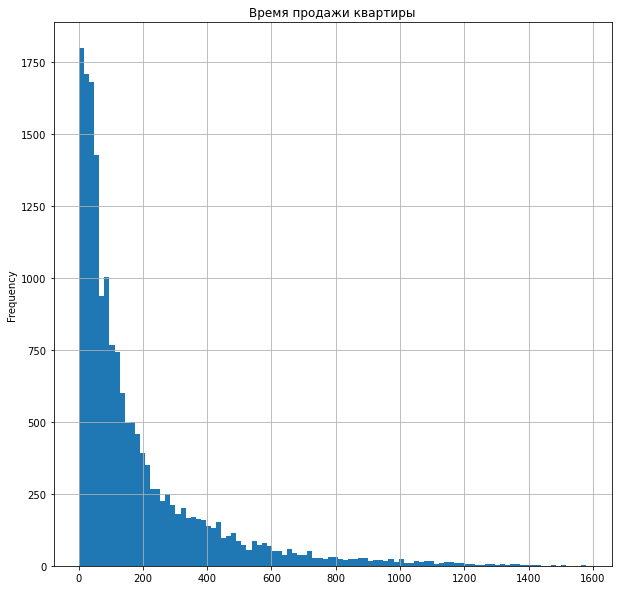

In [178]:
final_stat.query('days_exposition !=0')['days_exposition'].plot(kind='hist',
                                                                bins=100,
                                                                grid=True,
                                                                figsize=(10,10)).set_title('Время продажи квартиры')
plt.show()

In [179]:
final_stat.query('days_exposition !=0')['days_exposition'].describe()

count    17376.000000
mean       180.747410
std        218.441398
min          1.000000
25%         43.000000
50%         98.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Судя по гистограмме, основная часть квартир продается в диапазоне от 1 до 150 дней, при этом большая часть лежит в диапазоне от 40 до 90 дней, затем количество записей уменьшается. Медианное значение - 98 дней, при этом среднее больше почти в два раза: видимо, на это повлияло наличие нехарактерно больших сроков продажи, которые видно в виде тонкого "хвоста". Разрыва в значениях нет, поэтому вряд ли это выбросы. Такие большие показатели могут указывать на то, что с объявлением что-то не так, например, квартира не соответствует описанию или есть юридические проблемы.

### Взаимосвязь параметров

Используем матрицу корреляции, чтобы определить, какие параметры влияют на время продажи квартиры больше всего.

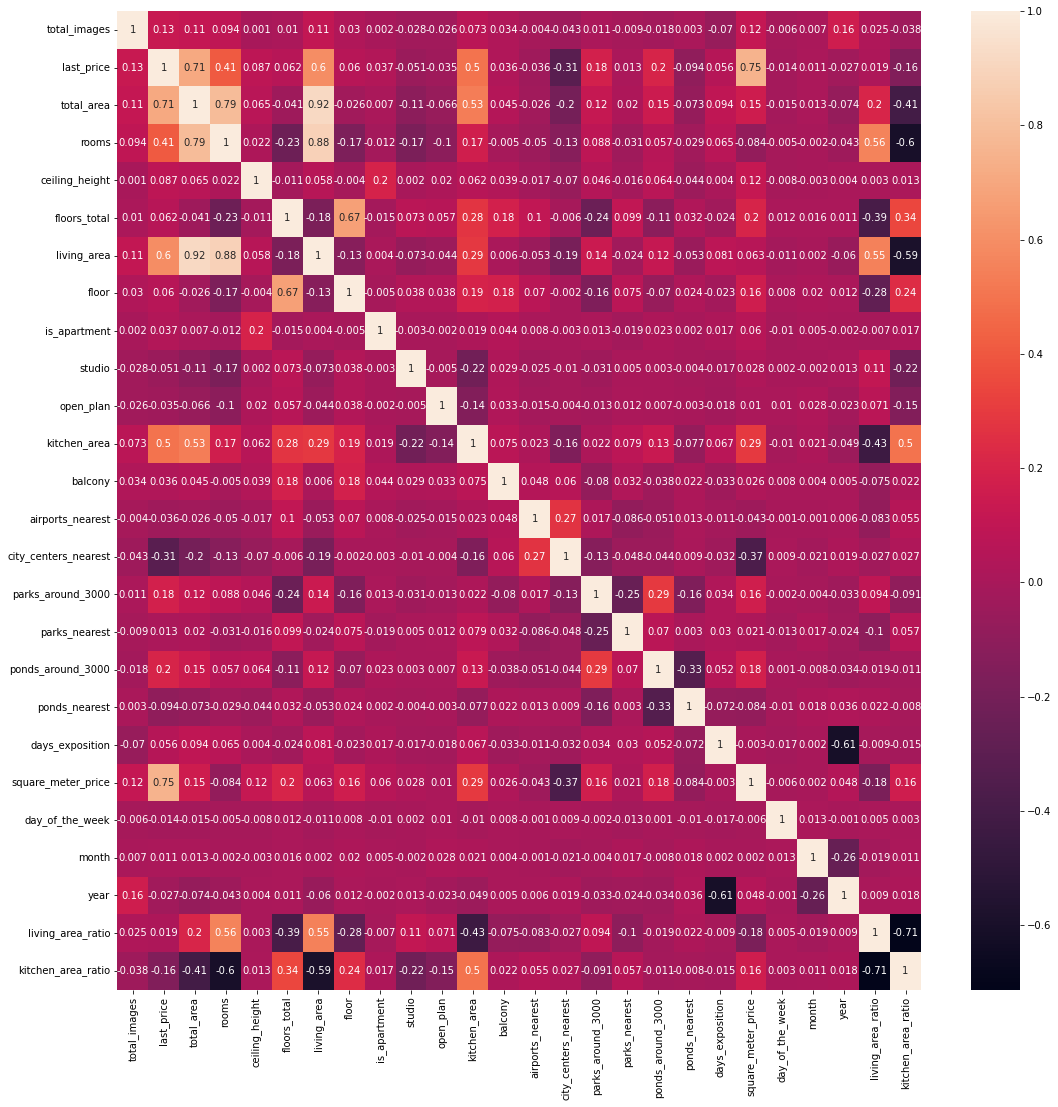

In [180]:
corr_matrix = final_stat.corr()
plt.subplots(figsize=(18, 18))
sns.heatmap(corr_matrix.round(3), annot=True)
plt.show()

Обратимся к времени продажи. На матрице видим близкие к 0 значения для высоты потолков, количества этажей, этажа и как ни странно цены за квадратный метр, а значит взаимосвязи между этими параметрами нет. Сильнее всего на время продажи влияют:  
- количество изображений: чем больше фото, тем быстрее продажа;
- общая стоимость квартиры: чем выше цена, тем больше время продажи;
- общая, жилая площадь, площадь кухни и количество комнат: чем больше эти параметры, тем дольше висит объявление;
- наличие водоемов поблизости и парков в радиусе 3 км: их наличие ускоряет продажу.  
Однако все эти параметры влияют довольно слабо, и на этом фоне выделяется год публикации объявления. В этой колонке наблюдается обратная взаимосвязь: чем больше год, тем меньше время продажи квартиры. Похоже, что со временем квартиры стали продаваться быстрее, при этом месяц и день публикации не так важны. Скорее всего это связано с развитием сервисов для продажи недвижимости.

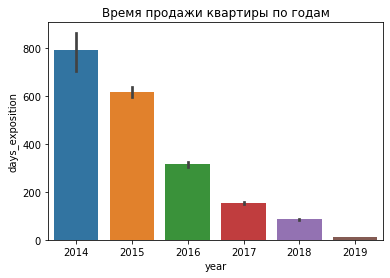

In [181]:
sns.barplot(data=final_stat, x='year', y='days_exposition').set_title('Время продажи квартиры по годам')
plt.show()

Среди факторов, влияющих на время продажи, помимо количества фотографий, наибольший вес имеет стоимость квартиры. Изучим, какие параметры влияют на стоимость. Цена квартиры рассчитывается, исходя из стоимости квадратного метра, и на матрице видно, что этот параметр влияет на цену сильнее всего: коэффициент `square_meter_price` - 0,76. А значит, логично рассматривать, какие параметры влияют не только на общую цену, но и на стоимость квадратного метра. На общую стоимость сильное влияние оказывают:  
- общая площадь: 0,71;
- жилая площадь: 0,6;
- площадь кухни: 0,51;
- количество комнат: 0,41;
- удаленность от центра: -0,31;
- водоемы и парки в радиусе 3 км: 0,2 и 0,18 соответственно.  

Итак, чем больше площадь квартиры и чем больше в ней комнат, тем выше общая стоимость, при этом метраж важнее, т.к. взаимосвязь более выражена. Очень важна удаленность от центра: чем ближе к центру, тем выше стоимость. Также большое значение для стоимости квартиры имеет наличие водоемов и парков в радиусе 3 км: чем их больше, тем выше стоимость.  
На стоимость квадратного метра сильнее всего влияет:  
- площадь кухни: 0,31;
- удаленность от центра: -0,37;
- общая площадь: 0,18;
Также на стоимость квадратного метра также значительное влияние оказывает количество этажей и этаж, на котором расположена квартира, т.к. многие обращают внимание на этот параметр при выборе недвижимости.

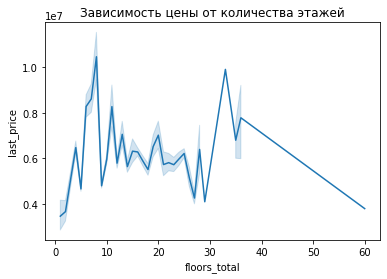

In [182]:
sns.lineplot(data=final_stat, x='floors_total',y='last_price').set_title('Зависимость цены от количества этажей')
plt.show()

По распределению цены в зависимости от этажности здания видим два пика.Самые высокие цены наблюдаются для зданий от 5 до 9 этажей (вероятно, старый фонд сталинской застройки) и для зданий 33-35 этажей. Как мы выяснили ранее, такие высокие здания скорее всего являются новостройками, что объясняет высокую стоимость.

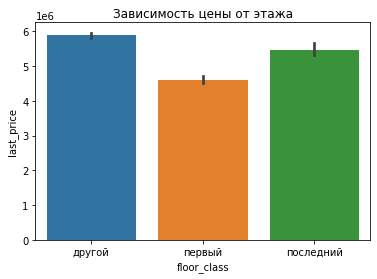

In [183]:
sns.barplot(data=final_stat, x='floor_class',y='last_price').set_title('Зависимость цены от этажа')
plt.show()

Самые низкие цены установлены для квартир на первом этаже, а самые высокие для квартир, этаж которых не является первым или последним. Проверим также, есть ли взаимосвязь между ценой и датой размещения.

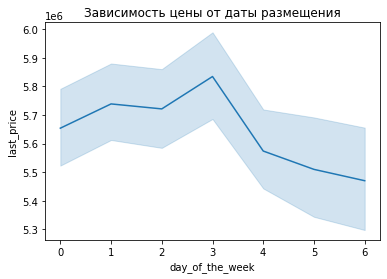

In [184]:
sns.lineplot(data=final_stat, x='day_of_the_week',y='last_price').set_title('Зависимость цены от даты размещения')
plt.show()

Пик высоких цен наблюдается в середине недели, а к концу недели заметно снижается и достигает минимума в выходные.

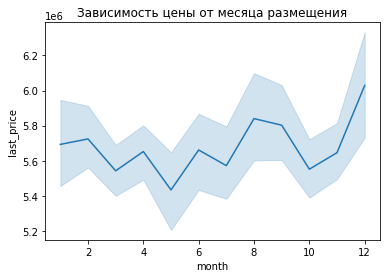

In [185]:
sns.lineplot(data=final_stat, x='month',y='last_price').set_title('Зависимость цены от месяца размещения')
plt.show()

Зависимость цены от месяца не так сильно выражена: в течение года наблюдаются скачки цен, однако, к концу года стоимость значительно повышается.

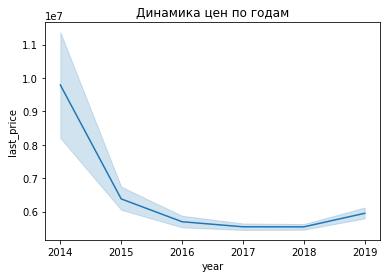

In [186]:
sns.lineplot(data=final_stat, x='year',y='last_price').set_title('Динамика цен по годам')
plt.show()

В динамике цен по годам наблюдается резкое снижение стоимости после 2015 года, что в целом объяснимо: в этот период начала восстанавливаться экономическая ситуация после кризиса 2014 года. Также этот график объясняет отрицательную динамику времени продажи в зависимости от года, очевидно, снижение цен повлияло на то, что квартиры стали продаваться быстрее.  
Самое большое влияние на стоимость недвижимости оказывают следующие параметры:  
- общая и жилая площадь;
- площадь кухни;
- количество комнат;
- удаленность от центра;
- наличие парков и водоемов в радиусе 3 км.  

Стоимость недвижимости резко снизилась после 2014 года, что повлияло на количество дней экспозиции объявлений.

### Укрупнение групп

Рассмотрим распределение предложений недвижимости по удаленности от центра. Большая часть значений распределилась в диапазоне до 20 км, и количество предложений постепенно снижается по мере удаленности. При этом на отметке в 50 км есть достаточно плотная группа значений, возможно там находится крупный город или районный центр.

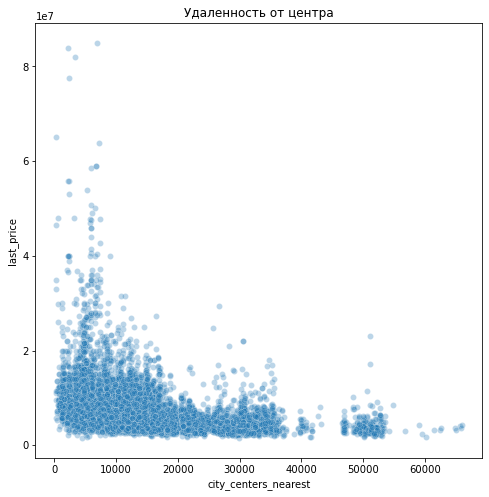

In [187]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=final_stat, x='city_centers_nearest', y='last_price', alpha=0.3).set_title('Удаленность от центра')
plt.show()

Выделим 10 регионов с наибольшим количеством объявлений и посчитаем среднюю и  медианную стоимость квадратного метра.

In [188]:
top_reg = final_stat['locality_name'].value_counts().head(10)
top_reg

санкт-петербург      13538
поселок мурино         468
поселок шушары         392
всеволожск             354
колпино                321
пушкин                 319
поселок парголово      285
гатчина                285
деревня кудрово        245
петергоф               188
Name: locality_name, dtype: int64

In [189]:
# фильтруем финальный датафрейм по населенным пунктам
top_reg_stat = final_stat.query('locality_name in @top_reg.index')

top_reg_stat = top_reg_stat.pivot_table(index='locality_name',
                                        values='square_meter_price',
                                        aggfunc=['median','mean']).round()

top_reg_stat.columns = ['median_square_meter_price', 'mean_square_meter_price']

top_reg_stat.sort_values(by='median_square_meter_price', ascending=False)

,median_square_meter_price,mean_square_meter_price
locality_name,,
санкт-петербург,103750.0,110715.0
пушкин,99431.0,102354.0
поселок парголово,92142.0,90440.0
деревня кудрово,92089.0,92676.0
поселок мурино,85878.0,85727.0
петергоф,81968.0,83970.0
поселок шушары,76876.0,78455.0
колпино,74722.0,75171.0
гатчина,67927.0,69318.0


Ожидаемо самая высокая стоимость жилья в Санкт-Петербурге, и там же опубликовано самое большое количество объявлений. Самые дешевые квартиры находятся во Всеволожске.  
Выберем предложения недвижимости в Санкт-Петербурге и определим, какая область входит в центр.

In [190]:
sp_stat = final_stat.query('locality_name == "санкт-петербург"').copy()
# переводим расстояние в километры
sp_stat['city_centers_km'] = (sp_stat['city_centers_nearest'] / (1000)).round()
# формируем сводную таблицу
sp_stat_pivot = sp_stat.pivot_table(index='city_centers_km',
                                    values = 'last_price',
                                    aggfunc=['median','mean']).round()

sp_stat_pivot.columns = ['median_last_price','mean_last_price']

sp_stat_pivot

,median_last_price,mean_last_price
city_centers_km,,
0.0,11500000,18818842.0
1.0,9875000,11328333.0
2.0,9000000,12107039.0
3.0,7950000,9118096.0
4.0,8400000,9542637.0
5.0,8494500,10049615.0
6.0,7907820,10266724.0
7.0,6990000,10690042.0
8.0,6990000,8119652.0


По таблице не получится понять, какая область еще может считаться центром, а какая уже нет. Построим график для наглядности:

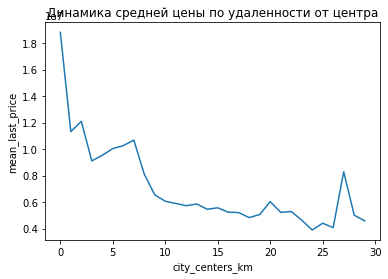

In [191]:
sns.lineplot(data=sp_stat_pivot, x='city_centers_km',
             y='mean_last_price').set_title('Динамика средней цены по удаленности от центра')
plt.show()

На графике видно резкое снижение цены в конкретной точке, а затем цена стабилизируется и начинает плавно снижаться.  
Можно сделать вывод, что к центру относится область примерно 7 км. Выделим сегмент квартир, относящихся к центру, и проанализируем основные параметры в этой группе.

In [192]:
# фильтр по удаленности от центра в таблице с данными по СПб
center_stat = sp_stat.query('city_centers_km <= 7')
# сводная таблица по стоимости
center_stat_price = center_stat.pivot_table(index='rooms',
                                            values=['square_meter_price','last_price'],
                                            aggfunc='median').round().reset_index(drop=True)
# переименуем столбцы
center_stat_price.columns = ['median_price', 'square_meter_price']
# сводная таблица по площади
center_stat_area = center_stat.pivot_table(
    index='rooms',
    values=['ceiling_height','total_area','living_area','living_area_ratio','kitchen_area_ratio','kitchen_area'],
    aggfunc='median').reset_index(drop=True)
# соединяем сводные таблицы в одну
center_stat_final = center_stat_price.join(center_stat_area).reset_index(drop=True)

In [193]:
center_stat_final

,median_price,square_meter_price,ceiling_height,kitchen_area,kitchen_area_ratio,living_area,living_area_ratio,total_area
0,5050000,135593.0,2.950,0.00,0.00,18.30,0.72,28.00
1,6100000,142486.0,2.700,10.70,0.24,18.00,0.45,42.00
2,7500000,124125.0,2.900,10.10,0.17,33.95,0.57,61.00
3,9400000,113089.0,2.950,11.00,0.13,51.00,0.62,84.60
4,10600000,102281.0,3.000,11.90,0.11,68.00,0.65,104.00
5,10800000,94110.0,3.015,13.25,0.11,80.00,0.65,121.05
6,11970000,99253.0,2.800,11.00,0.10,82.30,0.68,120.60
7,15350000,111940.0,2.950,20.70,0.15,82.00,0.60,135.00


In [194]:
center_stat.shape

(2637, 32)

Сравним показатели по квартирам в центре с показателями по всем квартирам и сделаем это на графике. Построим гистограммы по каждому параметру.

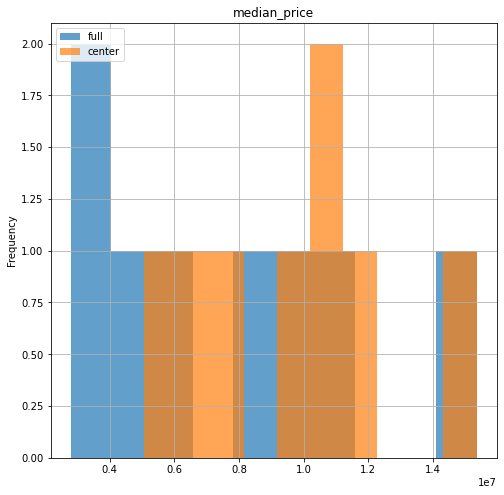

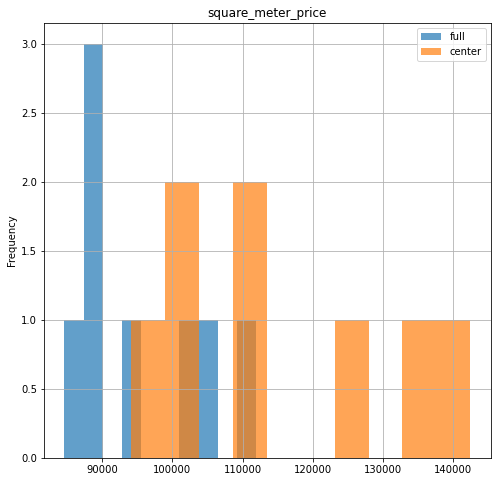

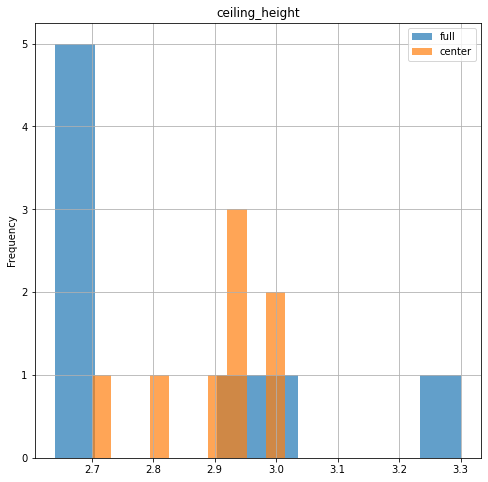

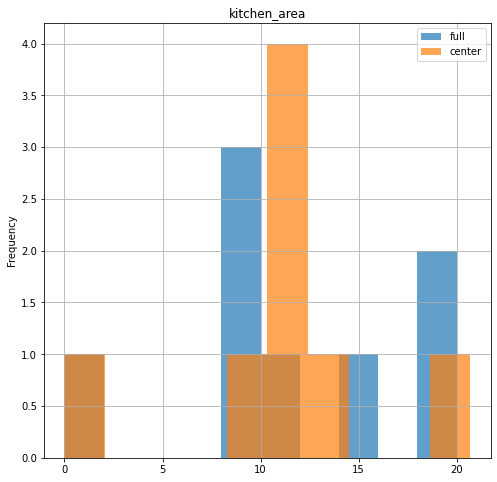

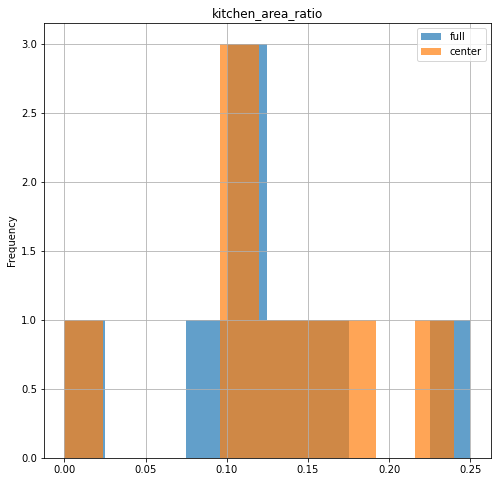

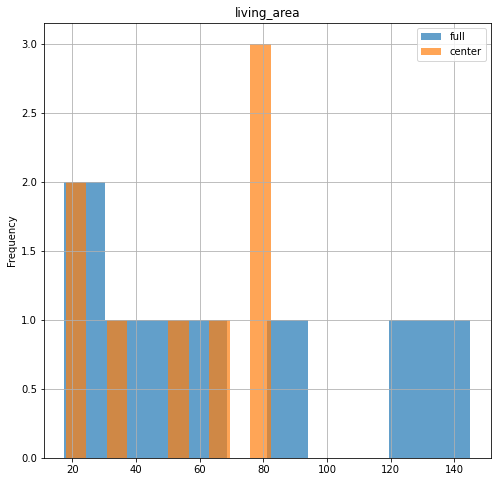

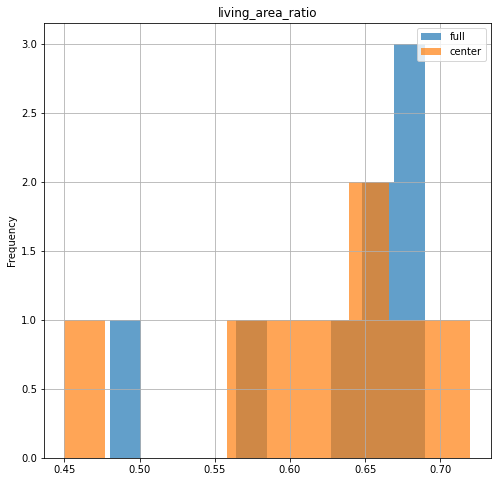

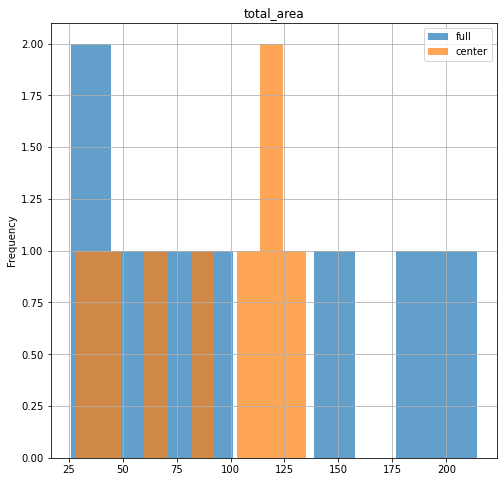

In [195]:
for col_1 in final_pivot:
    ax = final_pivot.plot(
    kind='hist',
    y=col_1,
    histtype='stepfilled',
    bins=10,
    linewidth=3,
    alpha=0.7,
    label='full',
    )

    center_stat_final.plot(
    kind='hist',
    y=col_1,
    histtype='stepfilled',
    bins=10,
    linewidth=3,
    alpha=0.7,
    label='center',
    ax=ax,
    grid=True,
    legend=True,
    figsize=(8,8),
    title=col_1
    )

Из сравнения можем сделать следующие выводы:  
- среди предложений недвижимости в центральном районе представлены квартиры до 7 комнат, больше всего среди них двух- и трехкомнатных квартир. В общую базу также попали квартиры до 7 комнат, поэтому графики выглядят одинаково;
- сам сегмент недвижимости в центре достаточно небольшой относительно всей базы - порядка 2600 предложений против 20 000;
- цена квадратного метра для квартир в центре распределена в диапазрне от 95 000 руб до 105 000 руб, примерно такое же количество значений находится в диапазоне 108-113 000 руб, и есть достаточно значительное количество данных с ценой свыше 124 000 руб. Для остальных районов максимальная стоимость - 111 000 руб, а основная масса значений находится в диапазоне от 83 000 до 104 000 руб. Медианная стоимость значительно выше в центральном районе;
- есть значительная разница в высоте потолков: для квартир в центре преобладают значения 2,9-3 м, а для остальных районов до 2,7 м;
- распределение показателей площади кухни для сегмента квартир в центре и всей базы в целом очень похожи, как и соотношение площади кухни площади к общей. При этом кухни в квартирах в центре больше: 11 - 13 м^2, когда как в остальных районах преобладают значения от 8 до 10 м^2, однако, кухонь большой площади 18-20 м^2 больше за пределами центра;
- среди квартир в центральных районах преобладают квартиры с жилой площадью от 78^2 до 82 м^2, чуть меньше значений с жилой площадью 18-22 м^2. В остальных районах распределение более равномерное, и преобладают небольшие показатели жилой площади - от 18 м^2 до 30 м^2, при этом квартиры с жилой площадью более 80 м^2 располагаются исключительно за пределами центра. Для недвижимости за пределами центрального района максимальное соотношение жилой площади к общей - 0,69, основная масса значений в пределах 0,63-0,69, при этом значений в пределах 0,58-0,63 нет. В центре основная часть значений расположилась в диапазоне 0,56-0,73;
- Сильно отличается и распределение общей площади. Для центральных явно преобладает диапазон от 100 до 130 м^2, в то время как для остальных районов - от 25 до 45 м^2. При этом максимальное значение в центре - 130 м^2, а за пределами - 230 м^2. 

Рассмотрим подробнее стоимость и параметры, которые на нее влияют.

In [196]:
# сводная таблица по стоимости квадратного метра и медианной стоимости квартиры
# в центральном районе и по всей базе
final_price_pivot = final_stat.pivot_table(index='rooms',
                                           values=['last_price','square_meter_price'],
                                           aggfunc='median')
# добавляем столбцы с ценой и стоимостью квадратного метра
# таблица сгруппирована по комнатам и отсортирована по возрастанию количества комнат,
# также как и сводная таблица с данными о недвижимости в центре, поэтому просто присоединяем столбцы
final_price_pivot['last_price_center'] = center_stat_final['median_price']
final_price_pivot['square_meter_center'] = center_stat_final['square_meter_price']

final_price_pivot

,last_price,square_meter_price,last_price_center,square_meter_center
rooms,,,,
0,2800000,106250,5050000,135593.0
1,3650000,101234,6100000,142486.0
2,4800000,93478,7500000,124125.0
3,6090700,88524,9400000,113089.0
4,8000000,89069,10600000,102281.0
5,10000000,84612,10800000,94110.0
6,10500000,88383,11970000,99253.0
7,15350000,111940,15350000,111940.0


Разница в стоимости квадратного метра сильнее выражена для квартир с небольшим количеством комнат, а с увеличением комнат разница уменьшается. При этом цена за квадратный метр одинакова для 6-комнатных квартир, а для 7-комнатных незначительная.  
Проверим, есть ли взаимосвязь между этажом и стоимостью квадратного метра.

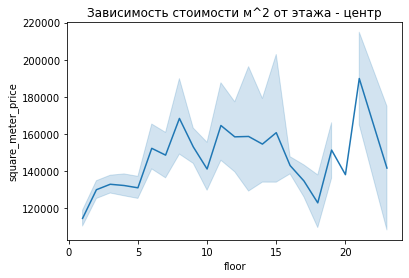

In [197]:
sns.lineplot(data=center_stat, x='floor', y='square_meter_price').set_title('Зависимость стоимости м^2 от этажа - центр')
plt.show()

Стоимость квадратного метра для центральных районов меняется незначительно для нижних этажей, а для верхних возрастает, начиная с 5 этажа, и делает резкий скачок вверх для 8 этажа.

In [198]:
center_stat['floor'].value_counts()

2     515
3     504
4     442
5     335
1     314
6     158
7      98
8      72
9      69
10     38
11     19
13     14
14     11
12     11
19      9
16      7
15      7
17      5
18      4
21      2
23      2
20      1
Name: floor, dtype: int64

Несмотря на то, что квартир выше 15 этажа мало, в целом все равно можно говорить о тенденции к увеличению стоимости для верхних этажей. Сравним этот показатель с остальными районами.

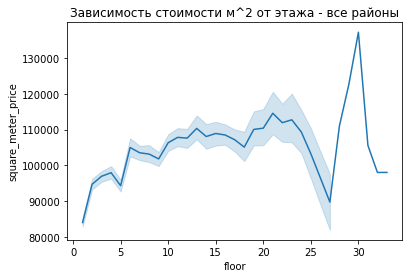

In [199]:
sns.lineplot(data=final_stat, x='floor', y='square_meter_price').set_title('Зависимость стоимости м^2 от этажа - все районы')
plt.show()

Для районов за пределами центра на графике есть резкое увеличение стоимости для 33-этажных домов, вероятно, это те самые новостройки. В целом высокие цены для зданий от 20 до 25 этажей, а самые низкие для малоэтажных домов.

Проверим динамику по другим параметрам, таким как день недели, месяц размещения и год.

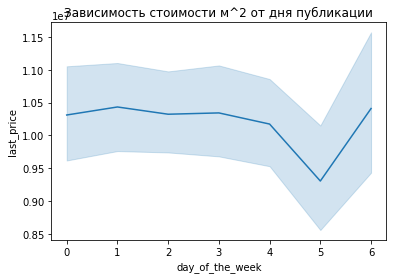

In [200]:
sns.lineplot(data=center_stat, x='day_of_the_week', y='last_price').set_title('Зависимость стоимости м^2 от дня публикации')
plt.show()

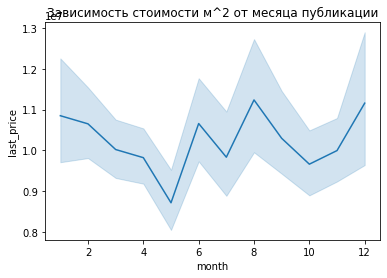

In [201]:
sns.lineplot(data=center_stat, x='month', y='last_price').set_title('Зависимость стоимости м^2 от месяца публикации')
plt.show()

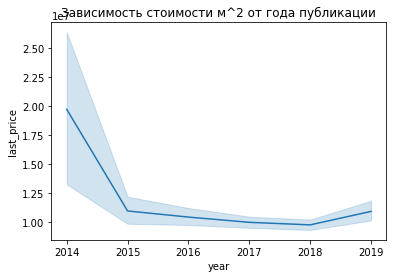

In [202]:
sns.lineplot(data=center_stat, x='year', y='last_price').set_title('Зависимость стоимости м^2 от года публикации')
plt.show()

Влияние даты публикации на стоимость очень похоже на картину по всей базе. Самые дорогие объявления публикуются в середине недели - в среду и четверг, а самая низкая стоимость у объявлений, опубликованных в выходные. В течение года наблюдается повышение цен в сентябре-октябре и декабре.  
В целом можно сказать, что для центральных районов выражено влияние тех же параметров, что и для всех остальных регионов, однако значения отличаются в большую сторону для общей площади и площади кухни.  
В центральном районе нет предложений в домах выше 8 этажей, большая часть квартир продается в домах с количеством этажей от 1 до 4, а стоимость квадратного метра и общая стоимость квартир значительно выше.

## Общий вывод

Большое влияние на стоимость недвижимости оказывают следующие параметры:   
- общая и жилая площадь; 
- площадь кухни; 
- количество комнат; 
- удаленность от центра; 
- наличие парков и водоемов в радиусе 3 км;
- этаж;
- дата публикации объявления;

После 2014 года наблюдается снижение стоимости недвижимости, что повлияло на длительность экспозиции объявлений - квартиры стали продаваться быстрее.  
Самые дорогие объявления публикуются в середине недели - в среду и четверг, а самая низкая стоимость у объявлений, опубликованных в выходные. В течение года наблюдается небольшое повышение цен в сентябре-октябре и более явное в декабре.  
В целом недвижимость продается в диапазоне от 1 до 150 дней, при этом большая часть лежит в диапазоне от 40 до 90 дней, затем количество записей уменьшается. Медианное значение - 98 дней. Объявления с неправдоподобно большими сроками публикации могут указывать на наличие проблем или несоответствие объявления реальным данным.

Высота потолков варьируется в пределах от 2,5 м до 3,3 м, для центральных районов этот показатель отличается: потолки там в основной массе выше, чем в других районах, и преобладают значения 2,9-3 м. Для остальных районов наиболее распространено значение до 2,7 м.  
Больше всего среди предложений представлены 1-,2- и 3-хкомнатных квартиры, далее количество плавно снижается и практически сходит на нет после 8 комнат. Квартиры с большим количеством комнат редки, и это также может указывать на то, что в объявлении указана недостоверная информация. Среди предложений недвижимости в центральном районе представлены квартиры до 7 комнат, больше всего среди них двух- и трехкомнатных квартир.  

Основная масса предложений находится в пределах 20 км от центра. За центр принят центральный район Санкт-Петербурга с радиусом 7 км.  

Большая часть представленных квартир имеет общую площадь в промежутке до 40 м^2, а после примерно 220 м^2 предложений практически нет, поэтому будет логично установить этот параметр <= 220. Для центральных районов основная масса значений лежит в диапазоне от 100 до 130 м^2, в то время как для остальных районов - от 25 до 45 м^2. При этом максимальное значение в центре - 130 м^2, а за пределами - 230 м^2.    
Среди квартир в центральных районах преобладают квартиры с жилой площадью от 78^2 до 82 м^2, чуть меньше значений с жилой площадью 18-22 м^2. В остальных районах распределение более равномерное, и преобладают небольшие показатели жилой площади - от 18 м^2 до 30 м^2, при этом квартиры с жилой площадью более 80 м^2 располагаются исключительно за пределами центра. 

Цена квадратного метра для квартир в центре распределена в диапазоне от 95 000 руб до 105 000 руб, примерно такое же количество значений находится в диапазоне 108-113 000 руб. Для остальных районов а основная масса значений находится в диапазоне от 83 000 до 104 000 руб. Медианная стоимость значительно выше в центральном районе: от 5 050 000 руб, а основная масса значений распределена до 11 000 000 руб. За пределами центра - от 2 730 000 руб, а большая часть значений находится до 10 125 000 руб. В целом основная масса значений распределяется в диапазоне до 11 500 000 руб, есть некое количество очень дорогих квартир, но такие предложения редки.